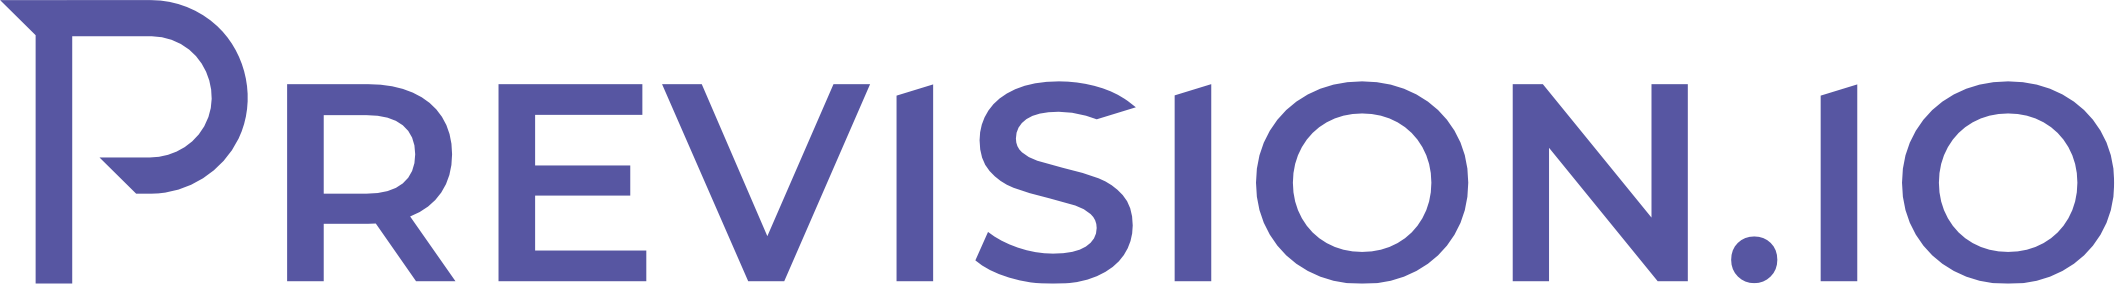

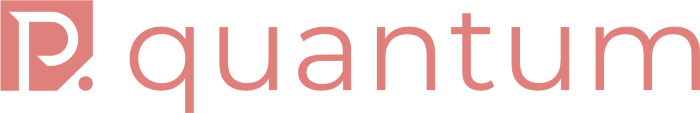

# Prevision-quantum-nn for binary classification

This notebook aims at showing the possibility of using quantum algorithms in order to perform classification.

First the useful libraries are imported:

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import prevision_quantum_nn as qnn

Then the dataset is defined. For this notebook, the dataset "moon" is imported from scikit learn. Other datasets can be used, but check their format!

In [2]:
num_samples = 200
X, y = datasets.make_moons(n_samples=num_samples, noise=0.05, random_state=0)
train_features, val_features, train_labels, val_labels = train_test_split(X, y, test_size=0.25, random_state=42)

The dataset is built:

In [3]:
dataset = qnn.get_dataset_from_numpy(train_features,
                                     train_labels,
                                     val_features=val_features,
                                     val_labels=val_labels)

The preprocessing parameters are defined. These parameters will be used in order to prepare the data before building the application.

List of preprocessing parameters for the classification application:
- force_dimension_reduction: allows dimension reduction if too many. Type: boolean
- polynomial_degree: degree of the polynomial expansion (1: no expansion). Type: integer
- padding: value of the padded data if required. Type: float

In [4]:
preprocessing_params = {
    "force_dimension_reduction": True,
    "polynomial_degree": 2
}

The model parameters are defined. These parameters configure the application itself. Please refer to the documentation for more details.

List of model parameters for the classification application:
- architecture: type or architecture (qubit or cv, for continuous variables). Type: string
- num_q: number of qubits/qumodes used. Type: integer
- encoding: data encoding method. Type: string
- use_early_stopper: allows the use of an early stop during the fit. Type: boolean
- early_stopper_patience: patience of the early stopper. Type: integer
- max_iterations: maximum number of epoch during the fit. Type: integer
- interface: interface option for Pennylane (autograd or tf). Type: string
- layer_type: type of circuit (template or custom). Type: boolean
- snapshot_frequency: snapshot_frequency: frequency in number of iterations at which the model needs to snapshot. Type: int
- verbose: allows verbosity during the fit. Type: boolean
- prefix: base name of the saved output files. Type: string
- num_layers: depth of the quantum circuit. Type: integer
- optimizer_name: defines the optimizer used for the fit. Type: string
- learning_rate: learning rate of the optimizer. Type: float

In [5]:
model_params = {
    "architecture": "qubit",
    "num_q": 5,
    "encoding": "angle",
    "use_early_stopper": True,
    "early_stopper_patience": 20,
    "max_iterations": 2000,
    "interface": "autograd",
    "layer_type": "template",
    "snapshot_frequency": 5,
    "verbose": True,
    "prefix": "moon",
    "num_layers": 4,
    "optimizer_name": "Adam",
    "learning_rate": 0.05,
}

The postprocessing parameters are defined. These parameters will be used in order to prepare the plotter showing the results of the application solving.

List of postprocessing parameters for the classification application:
- dim: dimension of the output plot. Type: integer
- prefix: base name of the saved output plots. Type: string
- min_max_array: range of the plot. Type: np.array([[x_min, x_max], [y_min, y_max]])
- verbose_period: definies how often plots are generated during the fit. Type: integer

In [6]:
postprocessing_params = {
    "phase_space_plotter": {
        "dim": 2,
        "verbose_period": 10,
        "prefix": "moon",
        "min_max_array": [[min(X[:,0]), max(X[:,0])],
                              [min(X[:,1]), max(X[:,1])]]
    }
}

Since all the parameters were defined, the application can be built.

In [7]:
application = qnn.get_application("classification",
                                  prefix="moon",
                                  preprocessing_params=preprocessing_params,
                                  model_params=model_params,
                                  postprocessing_params=postprocessing_params)

Before solving the application, save the parameters in order to be able to reload them in case of interruption of the solve method you will still have the weights file genereated by the snapshot_frequency keyword and will be able to reload the application, with the weights you want.

In [8]:
application.save_params()

The application can now be solved. Progression is shown below.

In [ ]:
application.solve(dataset)

starting iterations
iter: 0 train_loss: 5.457e-01 val_loss: 4.014e-01 auc: 0.50000
iter: 0 snapshotting weights into file.
iter: 1 train_loss: 5.137e-01 val_loss: 3.754e-01 auc: 0.50000
iter: 2 train_loss: 4.881e-01 val_loss: 3.549e-01 auc: 0.50000
iter: 3 train_loss: 4.662e-01 val_loss: 3.376e-01 auc: 0.50000
iter: 4 train_loss: 4.466e-01 val_loss: 3.224e-01 auc: 0.50000
iter: 5 train_loss: 4.286e-01 val_loss: 3.087e-01 auc: 0.50000
iter: 5 snapshotting weights into file.
iter: 6 train_loss: 4.115e-01 val_loss: 2.960e-01 auc: 0.50000
iter: 7 train_loss: 3.951e-01 val_loss: 2.840e-01 auc: 0.50000
iter: 8 train_loss: 3.792e-01 val_loss: 2.725e-01 auc: 0.50000
iter: 9 train_loss: 3.636e-01 val_loss: 2.614e-01 auc: 0.50000
iter: 10 train_loss: 3.483e-01 val_loss: 2.505e-01 auc: 0.50000
iter: 10 snapshotting weights into file.
iter: 11 train_loss: 3.332e-01 val_loss: 2.398e-01 auc: 0.50000
iter: 12 train_loss: 3.185e-01 val_loss: 2.294e-01 auc: 0.50000
iter: 13 train_loss: 3.043e-01 val_lo

iter: 113 train_loss: 7.346e-02 val_loss: 5.090e-02 auc: 0.95756
iter: 114 train_loss: 7.313e-02 val_loss: 5.065e-02 auc: 0.95756
iter: 115 train_loss: 7.280e-02 val_loss: 5.041e-02 auc: 0.95756
iter: 115 snapshotting weights into file.
iter: 116 train_loss: 7.248e-02 val_loss: 5.017e-02 auc: 0.95756
iter: 117 train_loss: 7.215e-02 val_loss: 4.993e-02 auc: 0.95756
iter: 118 train_loss: 7.183e-02 val_loss: 4.970e-02 auc: 0.95756
iter: 119 train_loss: 7.151e-02 val_loss: 4.947e-02 auc: 0.95756
iter: 120 train_loss: 7.119e-02 val_loss: 4.924e-02 auc: 0.95756
iter: 120 snapshotting weights into file.
iter: 121 train_loss: 7.087e-02 val_loss: 4.901e-02 auc: 0.95756
iter: 122 train_loss: 7.055e-02 val_loss: 4.879e-02 auc: 0.95756
iter: 123 train_loss: 7.023e-02 val_loss: 4.856e-02 auc: 0.97368
iter: 124 train_loss: 6.991e-02 val_loss: 4.834e-02 auc: 0.97368
iter: 125 train_loss: 6.959e-02 val_loss: 4.812e-02 auc: 0.97368
iter: 125 snapshotting weights into file.
iter: 126 train_loss: 6.927e-

The evolution of the train loss, validation loss and auc (called "metric" on the plot) during the fit can be visualized once the fit is done using the cell below (note: the file name is the "prefix" parameter used in the application following by the ".listing" extension).

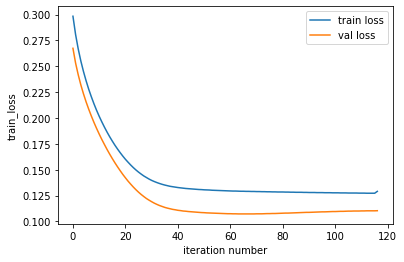

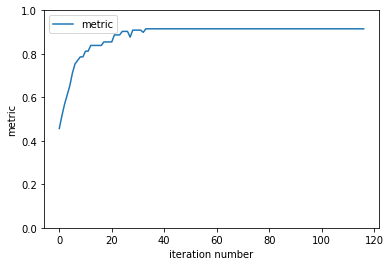

In [18]:
results_file = "moon.listing"
parsing = qnn.parse_results(results_file)
qnn.plot_losses(parsing)
qnn.plot_metric(parsing)

Finaly, the decision boundaries can also be visualized using the cell below. All the DB plots are saved under the name "prefix"_"iterationnumber".png. Change the name accordingly.

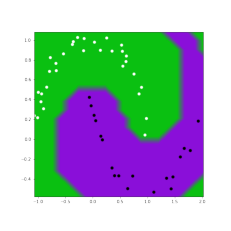

In [3]:
fig, ax = plt.subplots(1, 1) 
img=mpimg.imread('moon_230.png')
ax.imshow(img)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)